In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report,accuracy_score

In [109]:
df = pd.read_csv('diabetes.csv')

In [110]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Get the size of data

In [111]:
df.shape

(768, 9)

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Get the summary

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


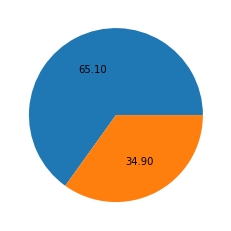

In [113]:
plt.pie(df.Outcome.value_counts(),autopct='%.2f')
plt.show()

<BarContainer object of 2 artists>

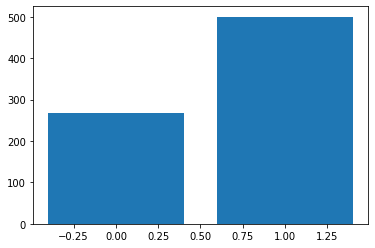

In [114]:
plt.bar(df.Outcome.unique(),height = df.Outcome.value_counts())

### Define features and target variables

In [40]:
X = df.drop(columns = ['Outcome'])

In [41]:
y = df['Outcome']

### Split the data for training and testing purpose

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [116]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
475,0,137,84,27,0,27.3,0.231,59
177,0,129,110,46,130,67.1,0.319,26
132,3,170,64,37,225,34.5,0.356,30
468,8,120,0,0,0,30.0,0.183,38
316,3,99,80,11,64,19.3,0.284,30


In [117]:
y_train.head()

475    0
177    1
132    1
468    1
316    0
Name: Outcome, dtype: int64

#### Train the model with the gini index as a ASM

In [133]:
dt = DecisionTreeClassifier(max_depth=3)

In [134]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [135]:
y_pred_train = dt.predict(X_train)

In [136]:
training_accuracy = accuracy_score(y_train,y_pred_train)*100
training_accuracy

77.0358306188925

In [137]:
y_pred = dt.predict(X_test)

In [138]:
testing_accuracy = accuracy_score(y_test,y_pred)*100
testing_accuracy

73.37662337662337

### Visualize the tree

In [124]:
from sklearn import tree

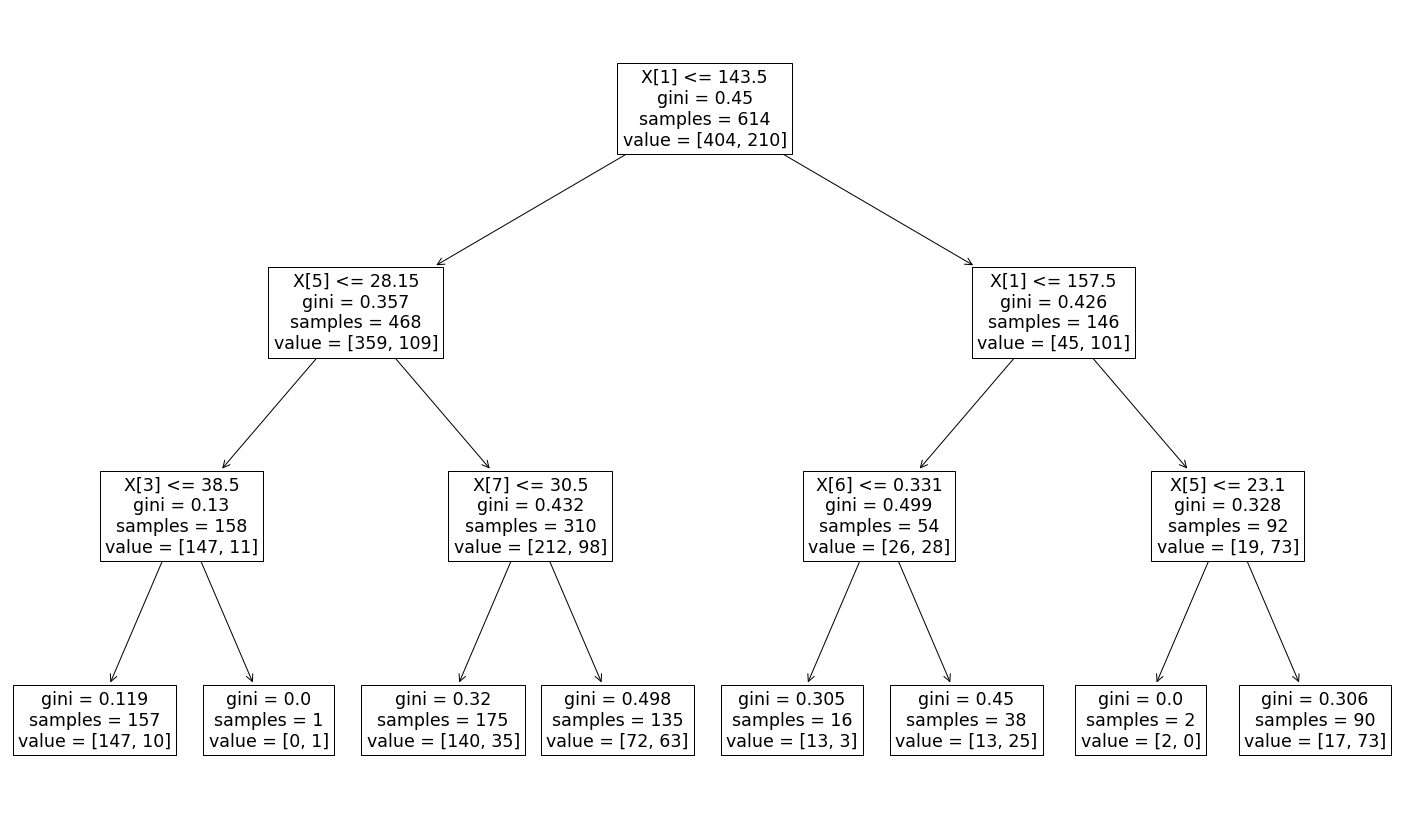

In [139]:
plt.figure(figsize=(25,15))
tree.plot_tree(dt.fit(X_train,y_train))
plt.show()

### Decision Tree with Entropy as an ASM

In [140]:
dt_new = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [141]:
dt_new.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [142]:
y_pred_entropy = dt_new.predict(X_train)

In [143]:
entropy_training_accaracy = accuracy_score(y_train,y_pred_entropy)*100
entropy_training_accaracy

77.19869706840392

In [144]:
y_pred_entropy_test = dt_new.predict(X_test)

In [145]:
entropy_testing_accaracy = accuracy_score(y_test,y_pred_entropy_test)*100
entropy_testing_accaracy

72.72727272727273

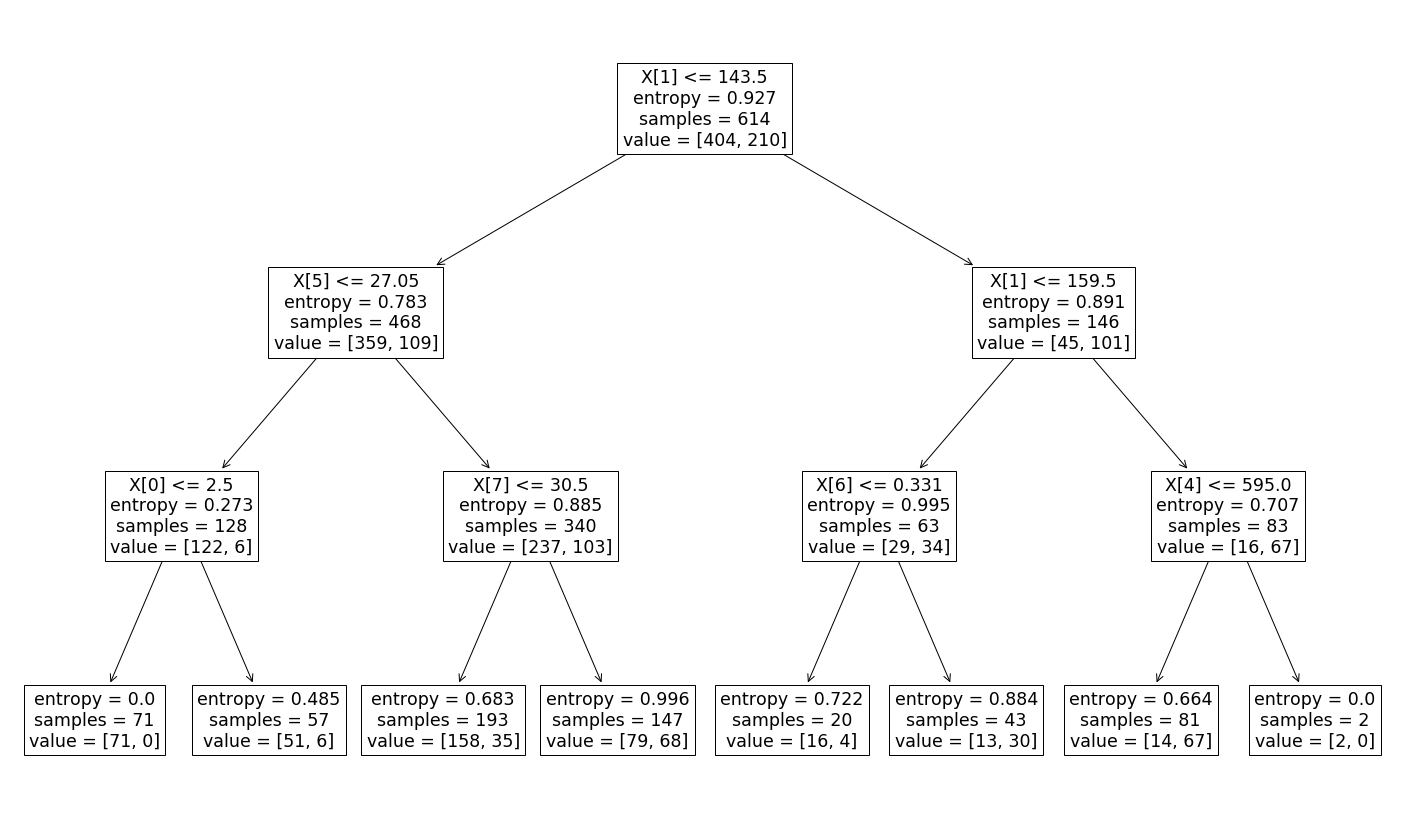

In [146]:
plt.figure(figsize=(25,15))
tree.plot_tree(dt_new.fit(X_train,y_train))
plt.show()